<a href="https://colab.research.google.com/github/rosafilgueira/Workflows_Seminar/blob/main/Testing_dispel4py_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dispel4py

[dispel4py](/https://github.com/StreamingFlow/d4py) is a free and open-source Python library for describing abstract stream-based workflows for distributed data-intensive applications. It enables users to focus on their scientific methods, avoiding distracting details and retaining flexibility over the computing infrastructure they use. It delivers mappings to diverse computing infrastructures, including cloud technologies, HPC architectures and specialised data-intensive machines, to move seamlessly into production with large-scale data loads. The dispel4py system maps workflows dynamically onto multiple enactment systems, and supports parallel processing on distributed memory systems with MPI and shared memory systems with multiprocessing, without users having to modify their workflows.

## Python Version

This version of dispel4py has been tested with Python 3.10

For earlier versions of dispel4py compatible with Python <`3.10 ( 2.7.5, 2.7.2, 2.6.6 and Python 3.4.3, 3.6, 3.7`) we recommend to go [here](https://gitlab.com/project-dare/dispel4py).


## Getting Started with dispel4py

Our journey begins with the installation of dispel4py, ensuring you have the necessary tools to dive into data processing. We present two distinct approaches to install dispel4py:

* Version 1: Direct installation using pip, suitable for quickly adding dispel4py and its stream-d4py companion to your Python environment.


* Version 2: For those preferring the latest versions or contributing to development, cloning from the GitHub repository and manual installation offers the cutting edge of dispel4py functionalities.

In [ ]:

#Version 1:
!pip install mpi4py
!pip install stream-d4py

# Version 2:
#!git clone https://github.com/StreamingFlow/d4py.git
#%cd d4py
#!pip install mpi4py
#!python setup.py install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.5-cp310-cp310-linux_x86_64.whl size=2746507 sha256=b4020eb5e2e9b75c7729b9ae881f0e33596fe7c90e6495b17bad8b015f107064
  Stored in directory: /root/.cache/pip/wheels/18/2b/7f/c852523089e9182b45fca50ff56f49a51eeb6284fd25a66713
Successfully built mpi4py
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 15.2 MB/s eta 0:00:00
   

## Part I- Simple Examples

This [directory](https://github.com/StreamingFlow/d4py/tree/main/dispel4py/examples/graph_testing) contains a collection of dispel4py workflows used for testing and validating the functionalities and behavior of dataflow graphs. These workflows are primarily used for testing purposes and ensure that the different mappings (e.g., simple, MPI, Storm) and various features of dispel4py work as expected. They help in verifying the correctness and efficiency of dataflow graphs during development and maintenance of the dispel4py library

Those examples are available in the installed version of dispel4py. To use them, you just need to indicate `dispel4py.examples.graph_testing.<WORKFLOW>` in the command line when using dispel4py.

### Word_Count dispel4py Workflow

We are going to use the word_count.py dispel4py workflow. This workflow counts words produced by a WordProducer.

```

from dispel4py.examples.graph_testing.testing_PEs import RandomWordProducer, WordCounter
from dispel4py.workflow_graph import WorkflowGraph

words = RandomWordProducer()
words.numprocesses = 1
counter = WordCounter()
counter.numprocesses = 3
graph = WorkflowGraph()
graph.connect(words, "output", counter, "input")
```

In this initial exploration of dispel4oy we are going to test three "mappings" - execution strategies that dispel4py employs to adapt workflows for different computing environments, ranging from sequential processing on a single core to distributed computing across multiple nodes, demonstrating dispel4py's flexibility and scalability. Here we are going to test two mappings:
  * simple: sequential execution
  * multi: parallel (shared memory) execution
  * mpi: parallel (distributed memory) execution

In [ ]:
## Simple mapping
!dispel4py simple dispel4py.examples.graph_testing.word_count -i 10

Processing 10 iterations.
RUN ARGS: 
Namespace(target='simple', module='dispel4py.examples.graph_testing.word_count', attr=None, file=None, data=None, iter=10, provenance=None)
Inputs: {'RandomWordProducer0': 10}
SimplePE: Processed 1 iteration.
Outputs: {'WordCounter1': {'output': [['Analysis', 1], ['Earthquake', 1], ['Earthquake', 2], ['Seismology', 1], ['Analysis', 2], ['Seismology', 2], ['Dispel4Py', 1], ['Analysis', 3], ['Computing', 1], ['Analysis', 4]]}}
ELAPSED TIME: 0.005039691925048828


Note that when executing in a parallel environment the output from each PE is not collected as in the simple mapping.

You are responsible for collecting this output and printing or storing it. Threfore, in this case, we wont see anything in the `Outputs`, when running with MULTI and MPI mappings.

In [ ]:
## Multi mapping
!dispel4py multi dispel4py.examples.graph_testing.word_count -i 10 -n 4

Processing 10 iterations.
RUN ARGS: 
Namespace(target='multi', module='dispel4py.examples.graph_testing.word_count', attr=None, file=None, data=None, iter=10, provenance=None, simple=False, num=4)
Processes: {'RandomWordProducer0': range(0, 1), 'WordCounter1': range(1, 4)}
WordCounter1 (rank 1): Processed 8 iterations.
WordCounter1 (rank 2): Processed 2 iterations.
RandomWordProducer0 (rank 0): Processed 10 iterations.
WordCounter1 (rank 3): Processed 0 iterations.
ELAPSED TIME: 0.020554304122924805


In [ ]:
## MPI mapping
!mpiexec -n 4 --allow-run-as-root --oversubscribe  dispel4py mpi dispel4py.examples.graph_testing.word_count -n 4

Processing 1 iteration.
Processing 1 iteration.
Processing 1 iteration.
Processing 1 iteration.
RUN ARGS: 
RUN ARGS: 
Namespace(target='mpi', module='dispel4py.examples.graph_testing.word_count', attr=None, file=None, data=None, iter=1, provenance=None, simple=False, num_processes=4)
RUN ARGS: 
Namespace(target='mpi', module='dispel4py.examples.graph_testing.word_count', attr=None, file=None, data=None, iter=1, provenance=None, simple=False, num_processes=4)
Processes: {'RandomWordProducer0': range(0, 1), 'WordCounter1': range(1, 4)}
RandomWordProducer0 (rank 0): Processed 1 iteration.
ELAPSED TIME: 0.0008144378662109375
WordCounter1 (rank 1): Processed 0 iterations.
ELAPSED TIME: 0.0033118724822998047
RUN ARGS: 
Namespace(target='mpi', module='dispel4py.examples.graph_testing.word_count', attr=None, file=None, data=None, iter=1, provenance=None, simple=False, num_processes=4)
WordCounter1 (rank 2): Processed 0 iterations.
ELAPSED TIME: 0.00029730796813964844
Namespace(target='mpi', mo

In [ ]:
!mpiexec -n 10 --allow-run-as-root --oversubscribe  dispel4py mpi dispel4py.examples.graph_testing.pipeline_test -i 20 -n 10

Processing 20 iterations.
Processing 20 iterations.
Processing 20 iterations.
Processing 20 iterations.
Processing 20 iterations.
Processing 20 iterations.
Processing 20 iterations.
Processing 20 iterations.
Processing 20 iterations.
Processing 20 iterations.
RUN ARGS: 
Namespace(target='mpi', module='dispel4py.examples.graph_testing.pipeline_test', attr=None, file=None, data=None, iter=20, provenance=None, simple=False, num_processes=10)
RUN ARGS: 
Namespace(target='mpi', module='dispel4py.examples.graph_testing.pipeline_test', attr=None, file=None, data=None, iter=20, provenance=None, simple=False, num_processes=10)
RUN ARGS: 
Namespace(target='mpi', module='dispel4py.examples.graph_testing.pipeline_test', attr=None, file=None, data=None, iter=20, provenance=None, simple=False, num_processes=10)
RUN ARGS: 
Namespace(target='mpi', module='dispel4py.examples.graph_testing.pipeline_test', attr=None, file=None, data=None, iter=20, provenance=None, simple=False, num_processes=10)
RUN ARGS

## Part II - Real Use Cases

This [repository](https://github.com/StreamingFlow/d4py_workflows.git) contains more complex "real-world" examples for specific scientific domains.

We are going to clone it! And lets use the ones that are under "Others" directory

In [ ]:
!git clone https://github.com/StreamingFlow/d4py_workflows.git

Cloning into 'd4py_workflows'...
remote: Enumerating objects: 748, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 748 (delta 52), reused 68 (delta 28), pack-reused 649
Receiving objects: 100% (748/748), 14.06 MiB | 9.23 MiB/s, done.
Resolving deltas: 100% (356/356), done.


In [ ]:
!ls /content/d4py_workflows/others

covid_workflow.py     README.md		     SensorWorkflow.py
even_odd_workflow.py  sensor_data_1000.json  skew_workflow.py


### Covid Workflow

[covid_workflow](./https://github.com/StreamingFlow/d4py_workflows/blob/main/others/covid_workflow.py) is focused on fetching, processing, and visualizing COVID-19 data, specifically for India. It begins with a DataProducer component that retrieves COVID-19 statistics from an online API, followed by a DataProcessor that parses this data to extract dates and daily new case figures. Lastly, the DataVisualizer component takes this processed data and creates a graphical representation of the COVID-19 daily new cases over time, plotting this data on a chart. The final output is a visual graph saved as an image file, providing a clear and informative depiction of the pandemic's trend in India. This workflow effectively combines data acquisition, manipulation, and visualization, making it a useful tool for analyzing and understanding the progression of COVID-19 cases. However, this is a statefull workflow - so only fixed mappings works with this workflow. Note that this workflow generates a covid_cases.png file with the visualization of the results.



In [ ]:
!pip install matplotlib
!pip install --user ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.7 MB/s eta 0:00:00


In [ ]:
!dispel4py simple d4py_workflows/others/covid_workflow.py

Processing 1 iteration.
RUN ARGS: 
Namespace(target='simple', module='d4py_workflows/others/covid_workflow.py', attr=None, file=None, data=None, iter=1, provenance=None)
Inputs: {'DataProducer0': 1}
SimplePE: Processed 1 iteration.
Outputs: {}
ELAPSED TIME: 1.3693981170654297


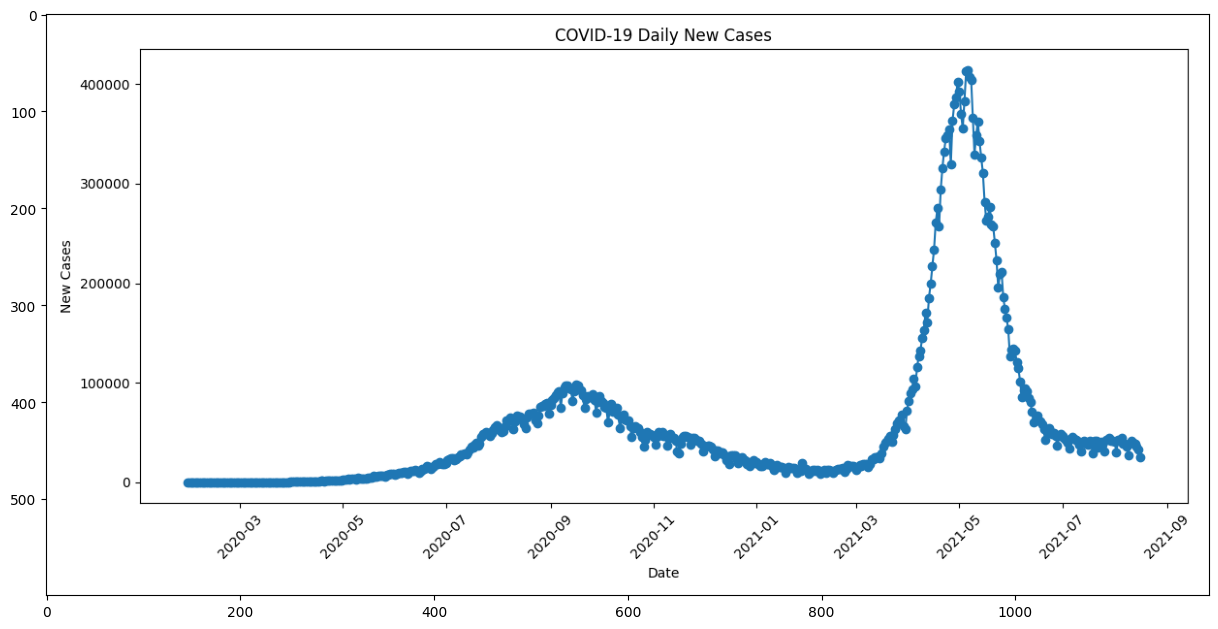

In [ ]:
import os
import matplotlib.pyplot as plt

# Set the figure size (width, height) in inches
plt.figure(figsize=(15, 8))  # You can adjust the size as needed


img = plt.imread('/content/covid_cases.png')
plt. imshow(img)

### Sensor Workflow

[This workflow](https://github.com/StreamingFlow/d4py_workflows/blob/main/others/SensorWorkflow.py) provides a streamlined process for handling sensor data, from ingestion to analysis and summarization. Initially, the ReadSensorDataPE reads sensor data from a JSON file, capturing essential details such as timestamps and temperature readings. Following this, the NormalizeDataPE normalizes these temperature readings to a standard scale, ensuring consistency and facilitating further analysis. The AnomalyDetectionPE then examines the normalized data to identify any readings that significantly deviate from expected patterns, flagging these as anomalies. Finally, the AggregateDataPE aggregates the data, summarizing it into more manageable reports or insights. By sequentially processing the data through these stages, the workflow efficiently transforms raw sensor readings into structured, analyzed, and summarized information, ready for further decision-making or reporting purposes.

In [ ]:
!dispel4py simple d4py_workflows/others/SensorWorkflow.py -d '{"read" : [ {"input" : "/content/d4py_workflows/others/sensor_data_1000.json"} ]}'

RUN ARGS: 
Namespace(target='simple', module='d4py_workflows/others/SensorWorkflow.py', attr=None, file=None, data='{"read" : [ {"input" : "/content/d4py_workflows/others/sensor_data_1000.json"} ]}', iter=1, provenance=None)
Inputs: {'read0': [{'input': '/content/d4py_workflows/others/sensor_data_1000.json'}]}
Anomaly detected at 2024-03-22T10:39:00.000: Temperature=29.8743859458, Normalized Temp is 0.746859648645
Anomaly detected at 2024-03-22T10:42:00.000: Temperature=30.6087105265, Normalized Temp is 0.7652177631625
Anomaly detected at 2024-03-22T10:47:00.000: Temperature=24.5871747346, Normalized Temp is 0.614679368365
Anomaly detected at 2024-03-22T10:52:00.000: Temperature=25.388832432, Normalized Temp is 0.6347208108
Anomaly detected at 2024-03-22T11:13:00.000: Temperature=27.4359214508, Normalized Temp is 0.68589803627
Anomaly detected at 2024-03-22T11:20:00.000: Temperature=29.344068406, Normalized Temp is 0.7336017101500001
Anomaly detected at 2024-03-22T11:24:00.000: Tempera

In [ ]:
!dispel4py simple d4py_workflows/others/SensorWorkflow.py -d '{"read" : [ {"input" : "/content/d4py_workflows/others/sensor_data_1000.json"} ]}' > sensor_output.txt

#### Postprocess Sensor_output.txt

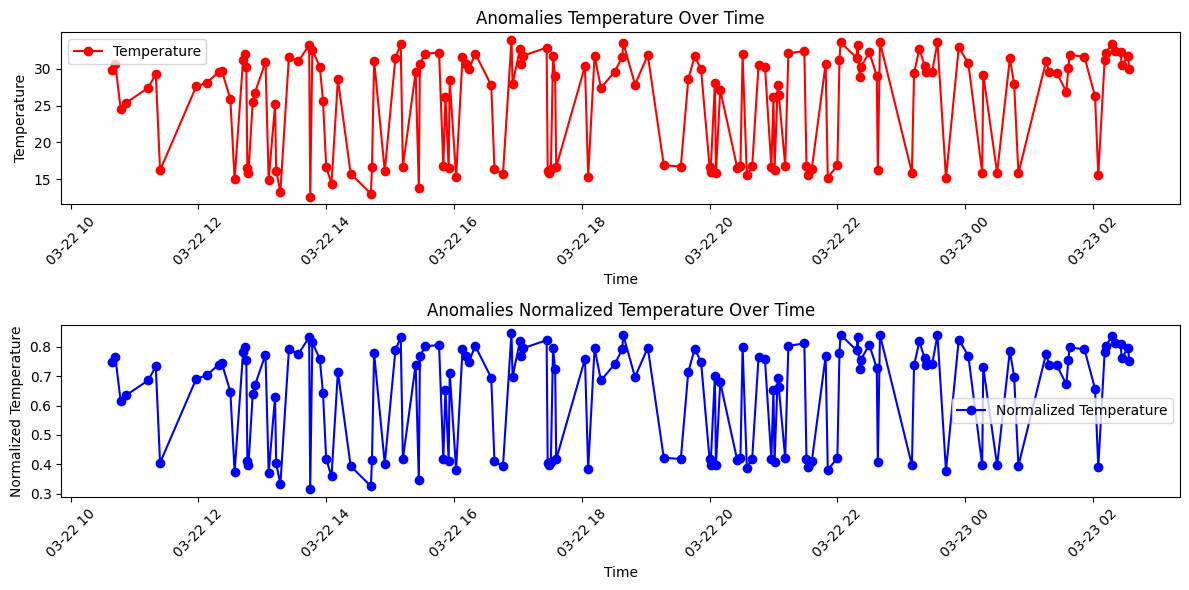

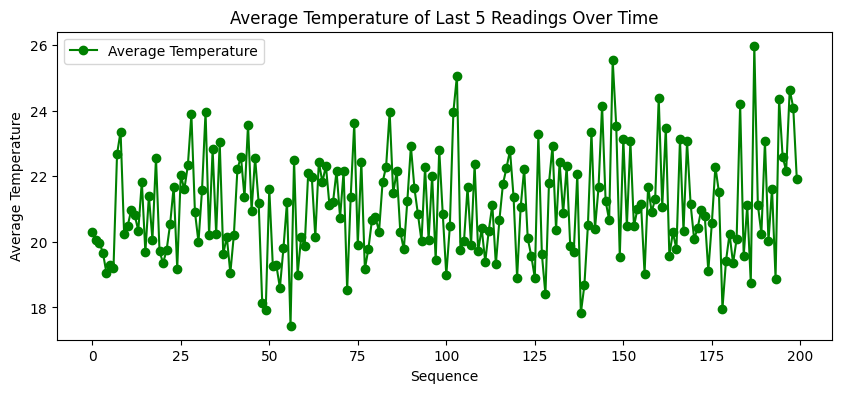

In [ ]:
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Initialize lists to store extracted data
timestamps = []
temperatures = []
normalized_temperatures = []
average_temperatures = []

# Regex patterns for matching lines
anomaly_pattern = re.compile(r"Anomaly detected at (\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}.\d{3}): Temperature=(\d+.\d+), Normalized Temp is (\d+.\d+)")
average_temp_pattern = re.compile(r"Average temperature of last 5 readings: (\d+.\d+)")

with open('sensor_output.txt', 'r') as file:
    for line in file:
        anomaly_match = anomaly_pattern.match(line)
        average_temp_match = average_temp_pattern.match(line)

        if anomaly_match:
            timestamp, temperature, normalized_temp = anomaly_match.groups()
            timestamps.append(datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%S.%f"))
            temperatures.append(float(temperature))
            normalized_temperatures.append(float(normalized_temp))

        elif average_temp_match:
            average_temperature = average_temp_match.groups()[0]
            average_temperatures.append(float(average_temperature))

# Visualization code
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(timestamps, temperatures, marker='o', linestyle='-', color='red', label='Temperature')
plt.title('Anomalies Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(timestamps, normalized_temperatures, marker='o', linestyle='-', color='blue', label='Normalized Temperature')
plt.title('Anomalies Normalized Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Normalized Temperature')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(average_temperatures, marker='o', linestyle='-', color='green', label='Average Temperature')
plt.title('Average Temperature of Last 5 Readings Over Time')
plt.xlabel('Sequence')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()
